In [1]:
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model
model = VGG16()
model.summary()

553476096/553467096 [==============================] - 39s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________________

In [2]:
# show name and position block
for i in range(len(model.layers)):
	layer = model.layers[i]
	print(i, layer.name, layer.output.shape)

0 input_1 (None, 224, 224, 3)
1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
3 block1_pool (None, 112, 112, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
6 block2_pool (None, 56, 56, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
10 block3_pool (None, 28, 28, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
14 block4_pool (None, 14, 14, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)
18 block5_pool (None, 7, 7, 512)
19 flatten (None, 25088)
20 fc1 (None, 4096)
21 fc2 (None, 4096)
22 predictions (None, 1000)


In [7]:
# visualize feature maps output from each block in the vgg model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
import cv2
import os
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
def getFeatureMap(model,index,size):  
  outputs = [model.layers[i].output for i in index]
  model = Model(inputs=model.inputs, outputs=outputs)
  # load the image with the required shape
  img = load_img('D:\code\python\CV\dog.jpg', target_size=(size[0], size[1]))
  # convert the image to an array
  img = img_to_array(img)
  # expand dimensions so that it represents a single 'sample'
  img = expand_dims(img, axis=0)
  # prepare the image (e.g. scale pixel values for the vgg)
  img = preprocess_input(img)
  # get feature map for first hidden layer
  feature_maps = model.predict(img)
  return feature_maps
  # plot the output from each block
  
def displayFeatureMap(feature_maps):
  square = 8
  ix = 1
  for _ in range(square):
    for _ in range(square):
      # specify subplot and turn of axis
      ax = pyplot.subplot(square, square, ix)
      ax.set_xticks([])
      ax.set_yticks([])
      # plot filter channel in grayscale
      pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
      if ix == 1:
        cv2.imwrite("feature1.png",feature_maps[0,:,:,ix-1])
      ix += 1
  # show the figure
  pyplot.show()
def saveFeatureMap(n_block,feature_maps):
  # create folder
  if not os.path.exists("./" + n_block):
    os.makedirs("./" + n_block)
  square = 8
  ix = 1
  for _ in range(square):
    for _ in range(square):
      # specify subplot and turn of axis
      cv2.imwrite("./"+n_block + "/" +n_block+str(ix-1)+ ".png",feature_maps[0,:,:,ix-1])
      ix += 1
  # show the figure



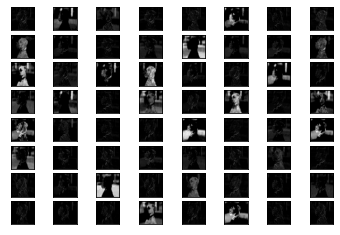

In [8]:
# visualize conv1
conv1 = getFeatureMap(model,[1],[224,224])
displayFeatureMap(conv1)
saveFeatureMap("conv1",conv1)

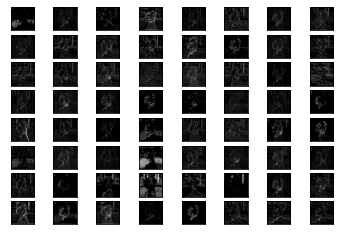

In [9]:
# visualize pool1
pool1 = getFeatureMap(model,[4],[224,224])
displayFeatureMap(pool1)
saveFeatureMap("pool1",pool1)

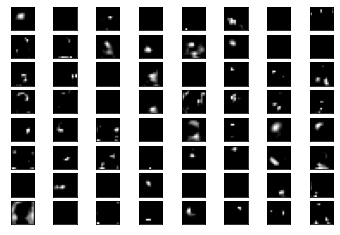

In [11]:
# conv17 
conv17 = getFeatureMap(model,[17],[224,224])
displayFeatureMap(conv17)
saveFeatureMap("conv17",conv17)